In [111]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

# Make Data

In [320]:
?np.random.multivariate_normal

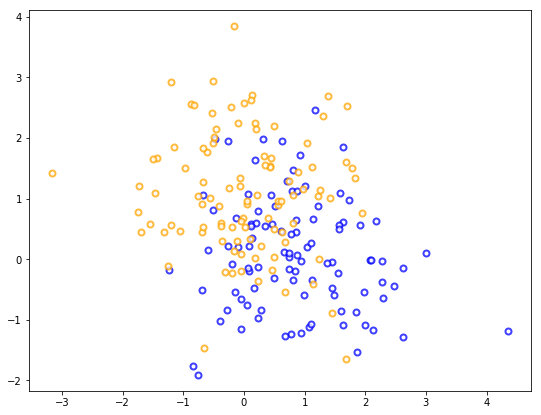

In [137]:
mean = (1, 0)
cov = [[1, 0], [0, 1]]
x1,y1 = np.random.multivariate_normal(mean, cov, (1, 100)).T

mean = (0, 1)
cov = [[1, 0], [0, 1]]
x2,y2 = np.random.multivariate_normal(mean, cov, (1, 100)).T

plt.figure(figsize=(9,7))
plt.plot(x1, y1, 'o', markerfacecolor='white', markeredgecolor='blue', markeredgewidth=2, alpha=0.75)
plt.plot(x2, y2, 'o', markerfacecolor='white', markeredgecolor='orange', markeredgewidth=2, alpha=0.75)
plt.axis('equal')
plt.show()

In [321]:
from scipy import stats 

In [323]:
?stats.multivariate_normal.rvs

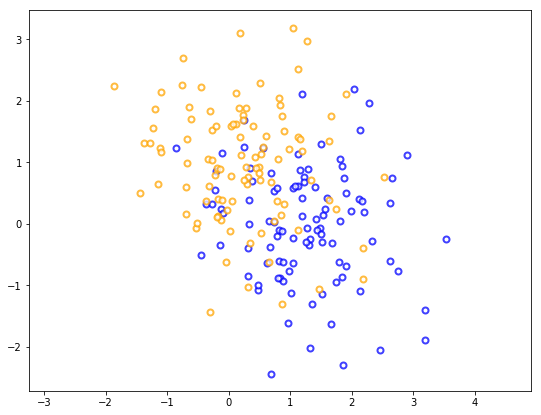

In [325]:
mean = (1, 0)
cov = [[1, 0], [0, 1]]
x1,y1 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=(1, 100), random_state=1).T

mean = (0, 1)
cov = [[1, 0], [0, 1]]
x2,y2 = stats.multivariate_normal.rvs(mean=mean, cov=cov, size=(1, 100),  random_state=1).T

plt.figure(figsize=(9,7))
plt.plot(x1, y1, 'o', markerfacecolor='white', markeredgecolor='blue', markeredgewidth=2, alpha=0.75)
plt.plot(x2, y2, 'o', markerfacecolor='white', markeredgecolor='orange', markeredgewidth=2, alpha=0.75)
plt.axis('equal')
plt.show()

__It's probably a better idea to use scipy's version because it offeres a random_state attribute (a seed) so that the same dataset is reproducible.__

In [138]:
print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)

(100, 1)
(100, 1)
(100, 1)
(100, 1)


In [326]:
# x1 y1 are blue  x2 y2 are orange
x = np.concatenate([x1.ravel(), x2.ravel()])  
y = np.concatenate([y1.ravel(), y2.ravel()])

# blue = ['BLUE',]*len(x1)
# orange = ['ORANGE',]*len(x2)

# BLUE-0, ORANGE-1
blue = [0,]*len(x1)
orange = [1,]*len(x2)
colors = np.concatenate([blue,orange])

In [327]:
data = pd.DataFrame(np.vstack(zip(x,y,colors)), columns=['x','y','color'])
data.color = data.color.astype(int) # convert color column back to int after numpy converts to floats.

In [328]:
data.head()

,x,y,color
0,2.624345,-0.611756,0
1,0.471828,-1.072969,0
2,1.865408,-2.301539,0
3,2.744812,-0.761207,0
4,1.319039,-0.249370,0


In [329]:
data.tail()

,x,y,color
195,1.160339,1.369493,1
196,1.904659,2.111057,1
197,0.659050,-0.627438,1
198,0.602319,1.420282,1
199,0.810952,2.044442,1


In [330]:
X = data.loc[:, ['x','y']]
y = data.loc[:, 'color']

In [331]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [332]:
fractions = []
for n in range(1, 50): 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,y)
    response = knn.predict(X)
    comparison = response == np.asarray(y)
    frac = comparison.sum()/len(comparison)
    fractions.append(frac)
    print('k = %2i:   %6.3f'%(n, frac))

k =  1:    1.000
k =  2:    0.810
k =  3:    0.825
k =  4:    0.815
k =  5:    0.805
k =  6:    0.790
k =  7:    0.790
k =  8:    0.770
k =  9:    0.800
k = 10:    0.795
k = 11:    0.790
k = 12:    0.805
k = 13:    0.795
k = 14:    0.805
k = 15:    0.800
k = 16:    0.795
k = 17:    0.800
k = 18:    0.805
k = 19:    0.800
k = 20:    0.800
k = 21:    0.800
k = 22:    0.805
k = 23:    0.795
k = 24:    0.785
k = 25:    0.790
k = 26:    0.790
k = 27:    0.780
k = 28:    0.795
k = 29:    0.790
k = 30:    0.795
k = 31:    0.790
k = 32:    0.780
k = 33:    0.785
k = 34:    0.785
k = 35:    0.790
k = 36:    0.795
k = 37:    0.795
k = 38:    0.800
k = 39:    0.800
k = 40:    0.800
k = 41:    0.800
k = 42:    0.805
k = 43:    0.800
k = 44:    0.805
k = 45:    0.805
k = 46:    0.815
k = 47:    0.800
k = 48:    0.800
k = 49:    0.780


Text(0, 0.5, 'fraction of successful predictions')

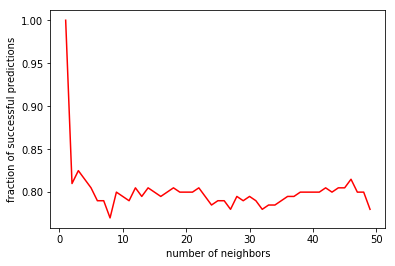

In [333]:
plt.plot(range(1, 50), fractions, 'r-')
plt.xlabel('number of neighbors')
plt.ylabel('fraction of successful predictions')

In [334]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [335]:
def plot_knn_meshgrid(**kwargs):
    X, y, xcol, ycol, n_neighbors, weights, h = [kwargs[key] for key in kwargs.keys()]
    try:
        plt.clf()
    except:
        pass
    
    # Create color maps
    #cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    cmap_bold = ListedColormap(['blue','orange'])
    cmap_light = ListedColormap(['blue','orange'])

    knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    knn.fit(X,y)

    # xaxis will be first column. yaxis will be second column.
    xmin = X.loc[:, xcol].min()-1
    xmax = X.loc[:, xcol].max()+1
    ymin = X.loc[:, ycol].min()-1
    ymax = X.loc[:, ycol].max()+1


    xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                         np.arange(ymin, ymax, h))


    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # .ravel() is the same as .flatten()

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(9,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.025)

    # Plot also the training points
    plt.scatter(X.loc[:, xcol],    # xdata
                X.loc[:, ycol],    # ydata
                c=y, 
                cmap=cmap_bold,
                edgecolor='k', 
                s=40, alpha=0.5)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('%s'%xcol, fontsize=18)
    plt.ylabel('%s'%ycol, fontsize=18)
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()

<Figure size 432x288 with 0 Axes>

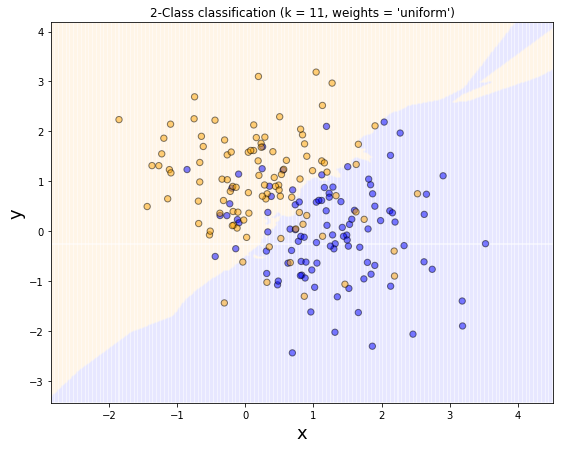

In [336]:
# weight options: 'distance' or 'uniform'
xcol = 'x'
ycol = 'y'


pars = {'X':            data.loc[:, [xcol, ycol]],  
        'y':            data.color, 
        'xcol':         xcol, 
        'ycol':         ycol, 
        'n_neighbors':  11, 
        'weights':      'uniform', #'distance', 
        'h':            0.02}


plot_knn_meshgrid(**pars)

In [337]:
from sklearn import metrics

In [338]:
# 11 neighbors
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
response = knn.predict(X)
print(metrics.accuracy_score(y, response))

0.79


# Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [341]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(80, 2)
(120,)
(80,)


In [342]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [343]:
y_pred = logreg.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.775


# Linear Regression

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# default split is 75% for training and 25% for testing

In [345]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


In [346]:
# import model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [347]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [348]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.5683191345436984
[-0.18978398  0.15913662]


In [349]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [350]:
# ROOT MEAN SQUARED ERROR.  

error = ( np.asarray(y_test) - np.asarray(y_pred) )   # residuals. vertical distance between line and data point. 
print(  np.sqrt( np.sum( error**2 ) / len(y_pred) ) ) # sum of the squared error is the numerator. AKA   RSS

# OR
MSE = metrics.mean_squared_error(y_test, y_pred)
print(np.sqrt( MSE ))

0.39351382763169457
0.39351382763169457


In [351]:
MSE

0.15485313253734703

In [352]:
linreg.score(X,y)

0.3517542813102651

In [353]:
linreg.score(X_train, y_train)

0.3416750762955153

In [354]:
linreg.score(X_test, y_test)

0.3765976950992473

__Linear Modeling Function:__

</br>

${\displaystyle y_{i}=\beta _{1}x_{i1}+\beta _{2}x_{i2}+\cdots +\beta _{p}x_{ip}+\varepsilon _{i}}$

</br>

As a rule, the constant term is always included in the set of regressors $X$, say, by taking $x_{i1} = 1$ for all observations $i = 1, …, n$. The coefficient $\beta_1$ corresponding to this regressor is called the intercept.

You can either choose to include a column of 1's in X (the training dataset), or you can just remember that the y-intercept is $\beta_1$ in this equation and that it is multipled by all 1's, meaning $x_{i1}$ is the column of 1's we are talking about. If we exclude the column of 1's (as the first column) in X, then ignore $x_{i1}$ in the equation. 

In [355]:
y_i = '%.3f'%linreg.intercept_
for coeff in linreg.coef_:
    y_i = ' + '.join([y_i, '%.3f * x'%coeff])
print(y_i)
line = lambda x: eval(y_i)

xarr = np.linspace(-3.2, 4.2, 10)
yarr = line(xarr)

0.568 + -0.190 * x + 0.159 * x


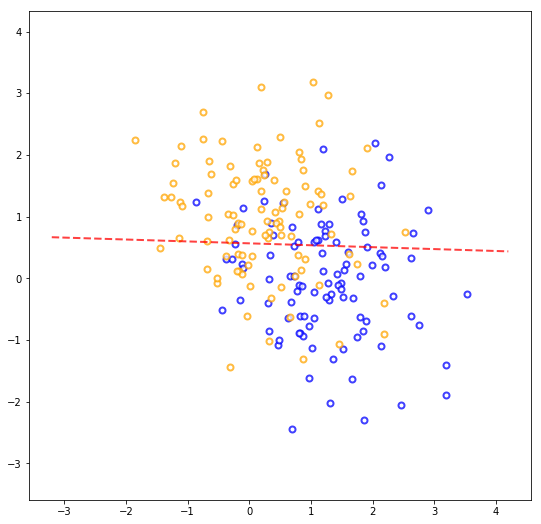

In [356]:
plt.figure(figsize=(9,9))
plt.plot(x1, y1, 'o', markerfacecolor='white', markeredgecolor='blue', markeredgewidth=2, alpha=0.75)
plt.plot(x2, y2, 'o', markerfacecolor='white', markeredgecolor='orange', markeredgewidth=2, alpha=0.75)
plt.plot(xarr, yarr, '--', color='red', lw=2, alpha=0.75)
plt.axis('equal')
plt.show()

__Now, perform a linear regression on ALL of the data, not just the training data. Just to see what we get.__

In [357]:
# instantiate
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [358]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.5653717616568
[-0.19511445  0.15698733]


We get very nearly the same thing. 

In [359]:
y_i = '%.3f'%linreg.intercept_
for coeff in linreg.coef_:
    y_i = ' + '.join([y_i, '%.3f * x'%coeff])
print(y_i)
line = lambda x: eval(y_i)

xarr2 = np.linspace(-3.2, 4.2, 10)
yarr2 = line(xarr2)

0.565 + -0.195 * x + 0.157 * x


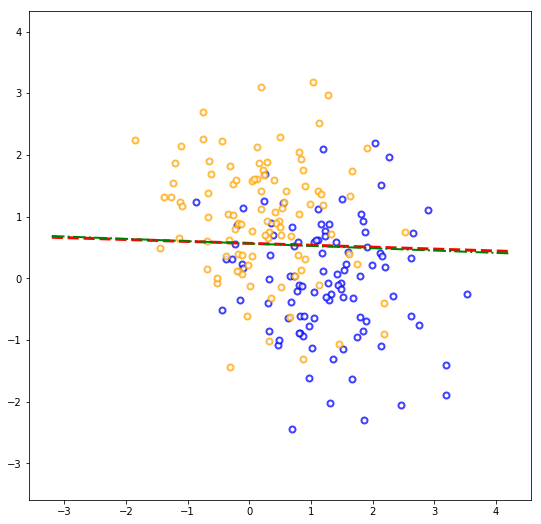

In [360]:
plt.figure(figsize=(9,9))
plt.plot(x1, y1, 'o', markerfacecolor='white', markeredgecolor='blue', markeredgewidth=2, alpha=0.75)
plt.plot(x2, y2, 'o', markerfacecolor='white', markeredgecolor='orange', markeredgewidth=2, alpha=0.75)
plt.plot(xarr, yarr, '--', color='red', lw=3, alpha=1, label='on training dataset')
plt.plot(xarr2, yarr2, '-.', color='green', lw=2, alpha=1, label='on full dataset')
plt.axis('equal')
plt.show()

## This was used for logistic regression, but can be adapted for linear regression. The decision boundaries are identified on the plot.